# Sarah A. Thomas
# Project 5 - Visit With Us

__Description__ (copied from assignment)

__Background and Context__

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

__Objective__

To predict which customer is more likely to purchase the newly introduced travel package.

__Data Dictionary__

Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer


# 1 - Load Packages and Read in the Dataset

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV

# to make Python code more structured
%load_ext nb_black

# Remove limit from displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [2]:
# load the data into pandas dataframe
travel = pd.read_excel("Tourism.xlsx", sheet_name=1)

<IPython.core.display.Javascript object>

# 2 - Data Preprocessing (1 of 2)

## 2.1 - Check the first and last 10 rows of the dataset and random 10 rows

In [3]:
travel.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


<IPython.core.display.Javascript object>

In [4]:
travel.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


<IPython.core.display.Javascript object>

In [5]:
np.random.seed(1)
travel.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


<IPython.core.display.Javascript object>

## 2.2 - Check the shape of the data

In [6]:
travel.shape

(4888, 20)

<IPython.core.display.Javascript object>

## 2.3 - Check the datatypes and row counts for each column

In [7]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

__Observations:__
* After checking for duplicates, will drop CustomerID since it does not provide any relevant information.
* The following have null values that need to be dealt with: Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome.
* The following need to be converted to Integer from Float: Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting
* The following need to be converted to categorical variables: ProdTaken, TypeofContact, CityTier,Occupation, Gender, ProductPitched, MaritalStatus, Passport, OwnCar, Designation.

## 2.4 - Check for duplicates and drop CustomerID

In [8]:
travel.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# Used customer ID to make sure there were no duplicate records
# Since there are no duplicate records, I can now drop CustomerID
travel.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

## 2.6 - Fix Gender "Fe Male" to "Female"

In [10]:
# Project FAQ mentions that there are cases where gender is "Fe Male"
# Changing "Fe Male" to "Female"

# This code changed all the variables in my dataframe to type "Object"
# travel.loc[travel["Gender"] == "Fe Male"] = "Female"

travel["Gender"] = np.where((travel.Gender == "Fe Male"), "Female", travel.Gender)

travel["Gender"].value_counts(dropna=False)

Male      2916
Female    1972
Name: Gender, dtype: int64

<IPython.core.display.Javascript object>

## 2.6 - Convert categoricals

In [11]:
travel["ProdTaken"] = travel["ProdTaken"].astype("category")
travel["TypeofContact"] = travel["TypeofContact"].astype("category")
travel["CityTier"] = travel["CityTier"].astype("category")
travel["Occupation"] = travel["Occupation"].astype("category")
travel["Gender"] = travel["Gender"].astype("category")
travel["ProductPitched"] = travel["ProductPitched"].astype("category")
travel["MaritalStatus"] = travel["MaritalStatus"].astype("category")
travel["Passport"] = travel["Passport"].astype("category")
travel["OwnCar"] = travel["OwnCar"].astype("category")
travel["Designation"] = travel["Designation"].astype("category")

<IPython.core.display.Javascript object>

# 3 - EDA

## 3.1 - Explore Summary of Data

In [12]:
travel.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,2.0,0.0,3968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,3.0,1.0,3190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,2,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
ProductPitched,4888,5,Basic,1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

__Observations:__
* ProdTaken: Most customers have not purchased a package.
* Age: Ranges from 18 to 61 with a median age of 36 and mean of 37.62. Indicates right-skewed distribution.
* TypeofContact: Most customers were self enquiries.
* CityTier: Most are Tier 1.
* DurationOfPitch: The mean is 15.49 minutes and the median is 13. Indicates a right-skewed distribution.
* Occupation: Most customers are Salaried.
* Gender: Most customers are Male.
* NumberOfPersonVisiting: The mean for number of persons planning to take a trip with the customer is 2.91 with a median of 3. Indicates a nearly symmetrical distribution.
* NumberOfFollowups: The mean number of followups after the salespitch is 3.71 and the median is 4.0, indicating a nearly symmetrical distribution.
* ProductPitched: Most salespeople pitched the Basic package.
* PreferredPropertyStar: The mean customer rating was 3.58 and the median was 3.0, indicating a slightly right-skewed distribution.
* MaritalStatus: Most customers are married.
* NumberOfTrips: The mean is 3.24 and the median is 3 indicating a nearly symmetrical distribution.
* Passport: Most customers do not have a passport.
* PitchSatisfactionScore: The mean is 3.08 and the median is 3.0, indicating a nearly symmetrical distribution.
* OwnCar: Most customers own their own car.
* NumberOfChildrenVisiting:  Number of children less than age 5 planning to take the trip with the customer - mean is 1.19 and median is 1.0 indicating a nearly symmetrical distribution.
* Designation: Most are designated as Executive.
* MonthlyIncome: Mean is 23619.85 and median is 22347 indicating a right-skewed distribution.

## 3.2 - Univariate Analysis

In [13]:
# Function copied from prior case study:
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 3.2.1 - Age

<AxesSubplot:xlabel='Age'>

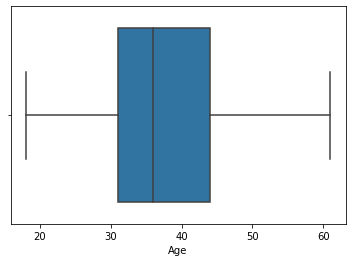

<IPython.core.display.Javascript object>

In [14]:
sns.boxplot(travel["Age"])

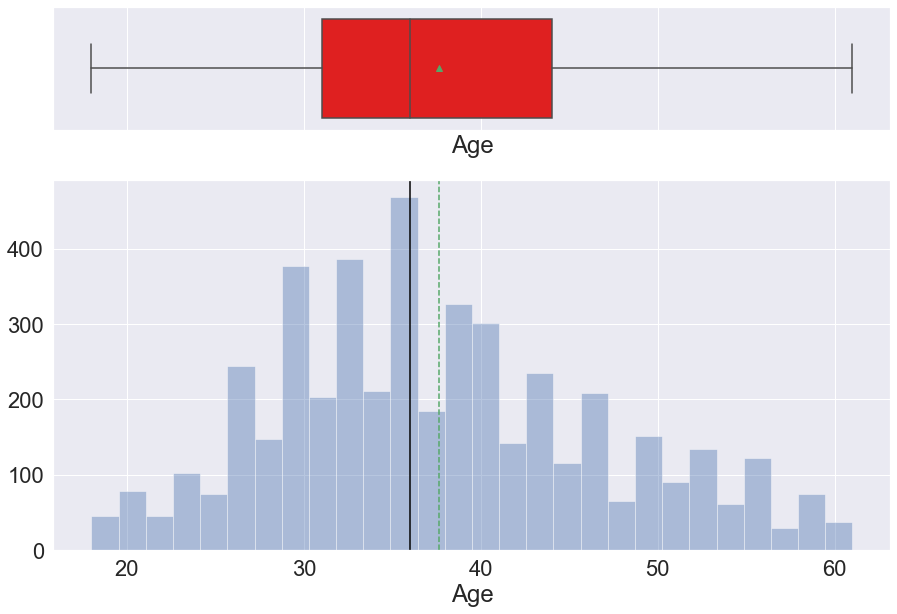

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(travel["Age"])

__Observation:__ Age is right-skewed (confirmation from previous observation).

### 3.2.2 - Duration of Pitch

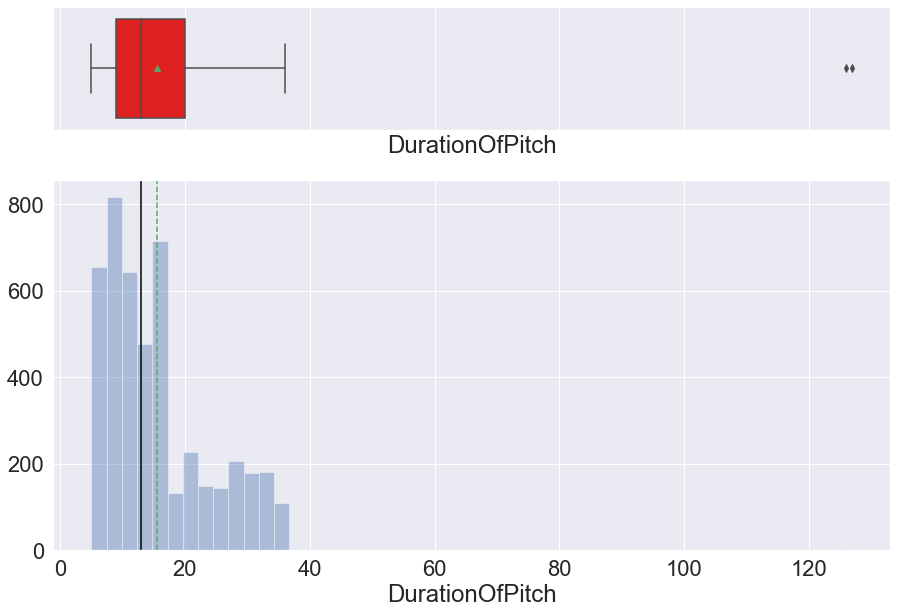

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(travel["DurationOfPitch"])

### 3.2.3 - Number of Persons Visiting

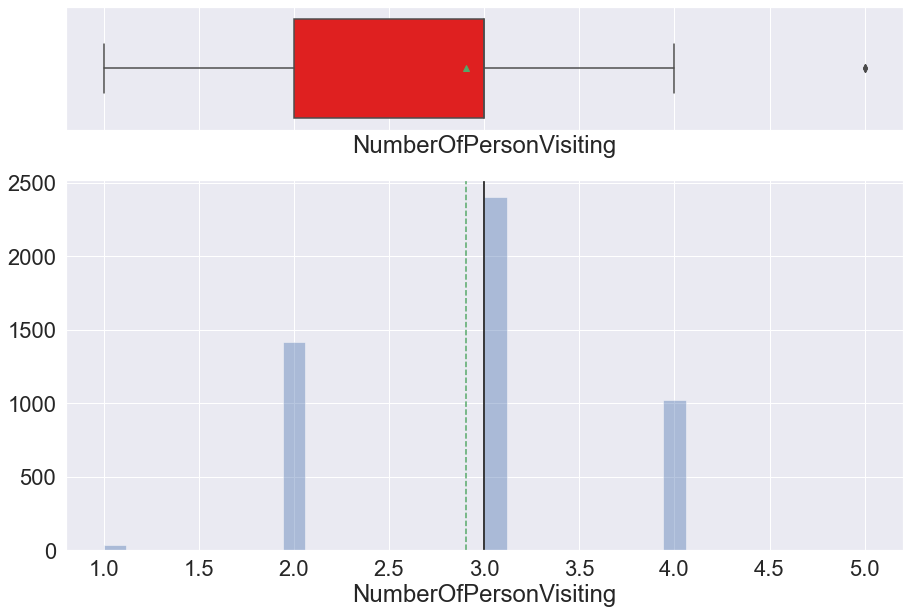

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(travel["NumberOfPersonVisiting"])

### 3.2.4 - Number of Follow Ups

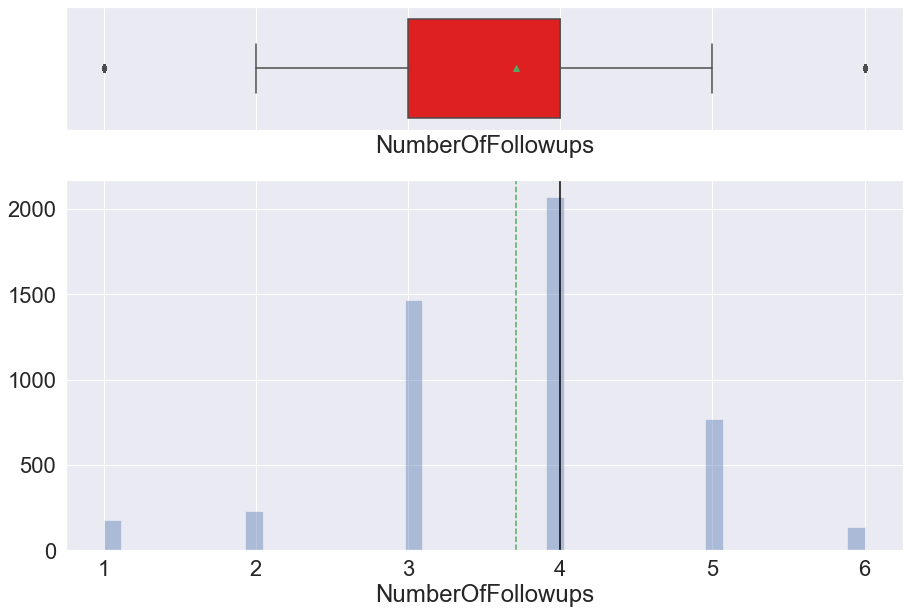

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(travel["NumberOfFollowups"])

### 3.2.5 - Preferred Property Star

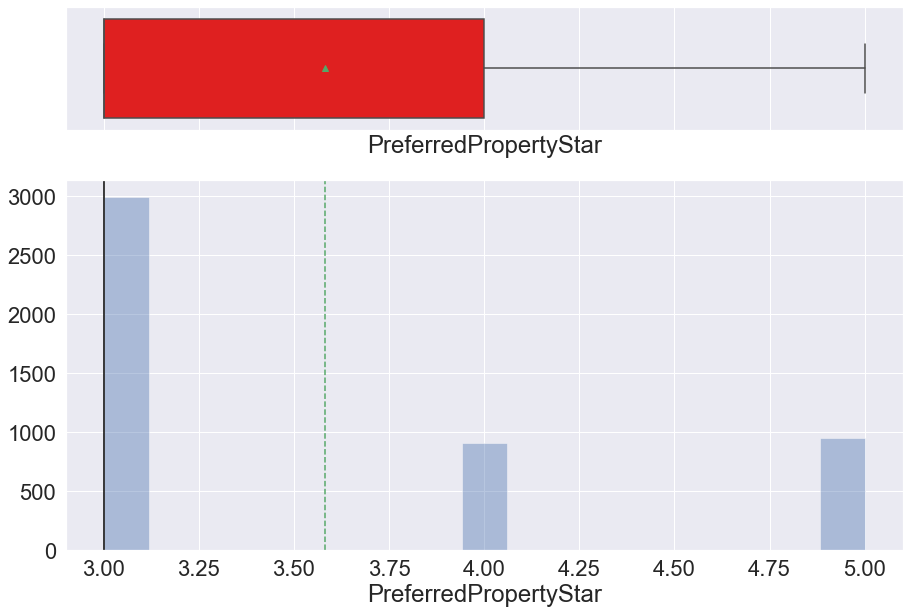

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(travel["PreferredPropertyStar"])

### 3.2.6 - Number of Trips

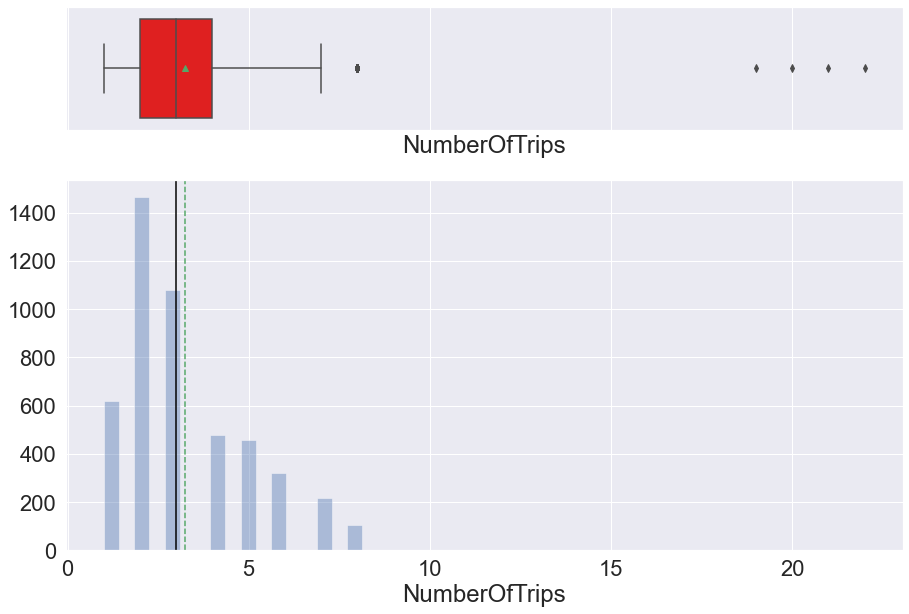

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(travel["NumberOfTrips"])

### 3.2.7 - Pitch Satisfaction Score

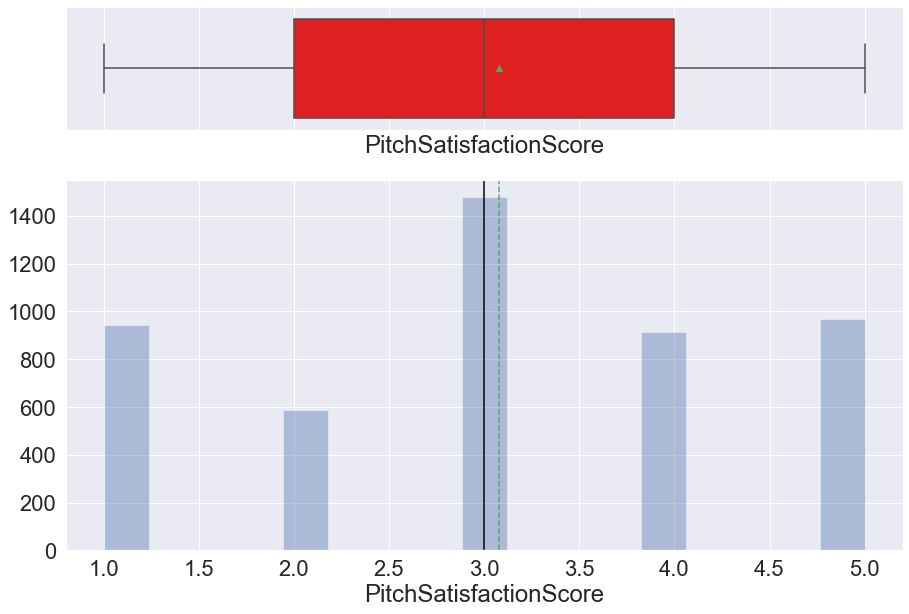

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(travel["PitchSatisfactionScore"])

### 3.2.8 - Number of Children Visiting

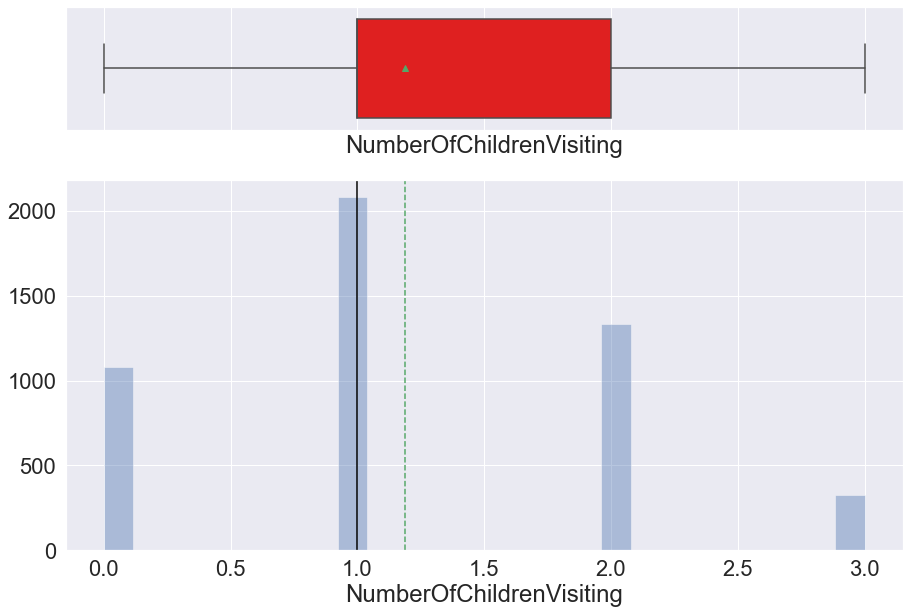

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(travel["NumberOfChildrenVisiting"])

### 3.2.9 - Monthly Income

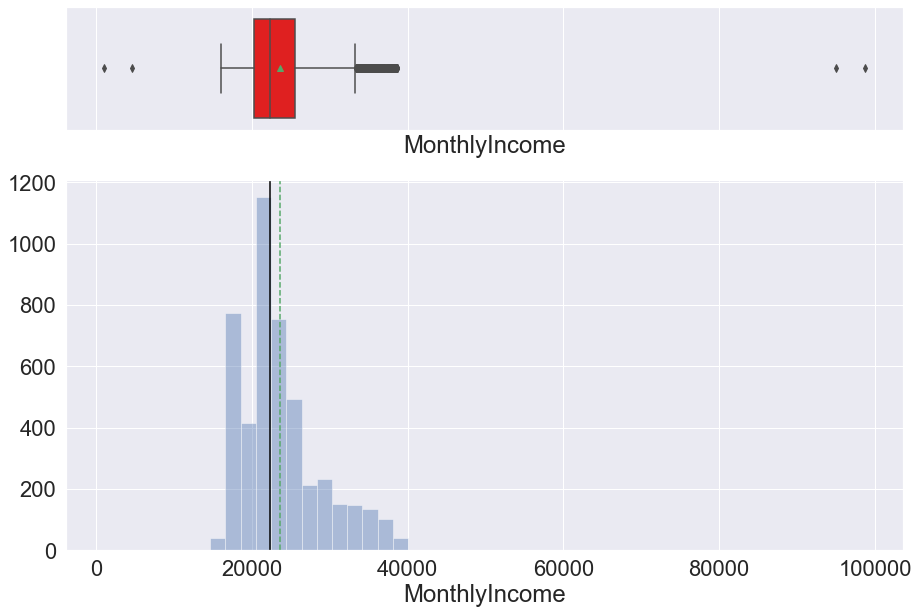

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(travel["MonthlyIncome"])

In [24]:
# Function that creates barplots with percentage displayed over each category.
# Learned/customized from debrief of Project 1 Cardio Good Fitness
def perc_on_bar(plot, feature):
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=18)
    plt.show()

<IPython.core.display.Javascript object>

### 3.2.10 - Product Taken

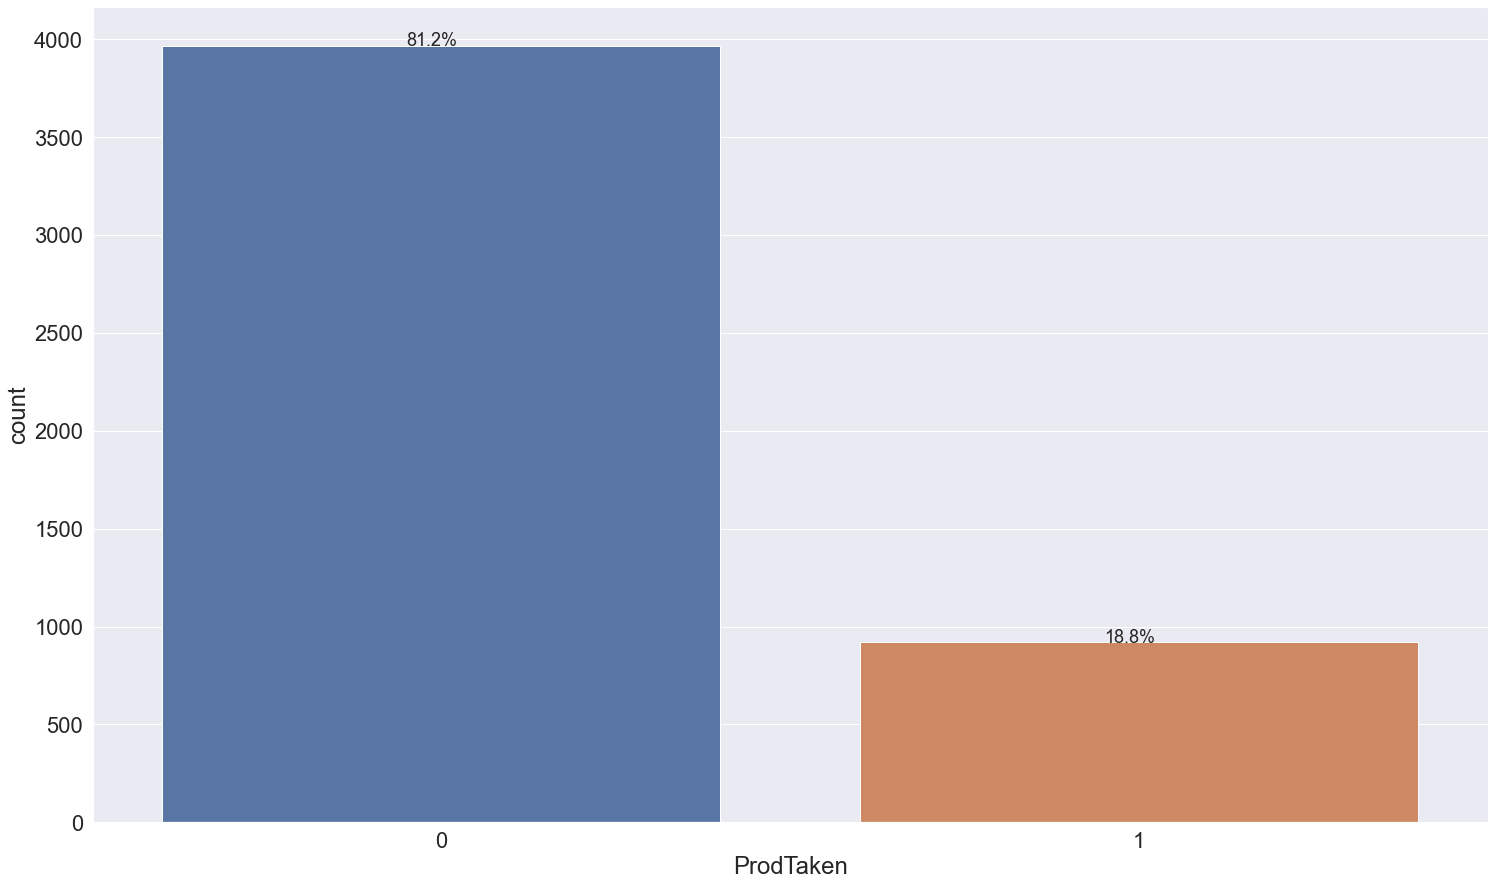

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["ProdTaken"])
perc_on_bar(ax, travel["ProdTaken"])

### 3.2.11 - Type of Contact

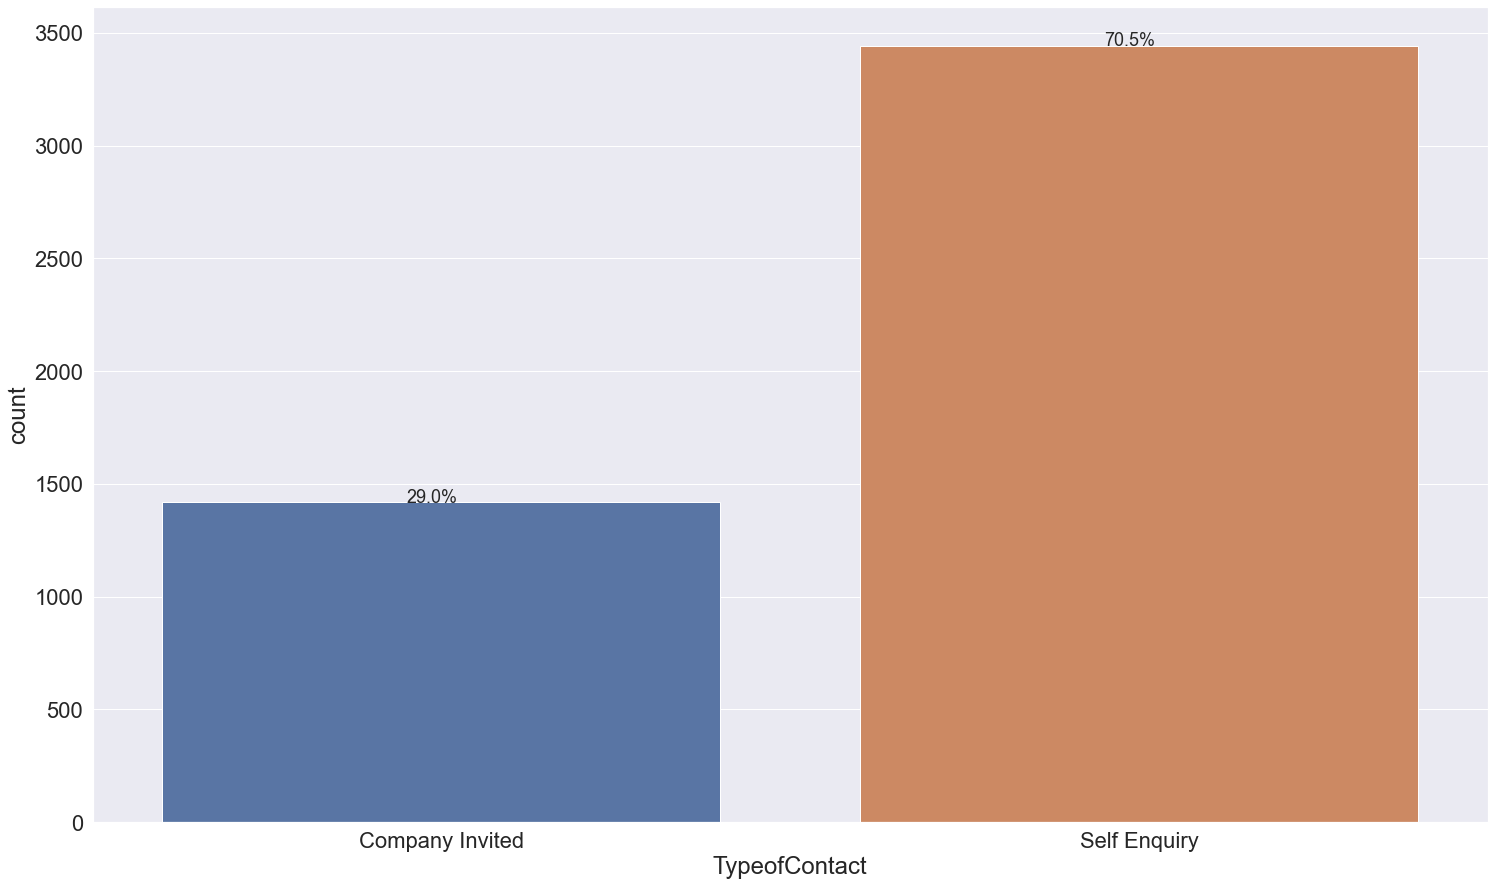

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["TypeofContact"])
perc_on_bar(ax, travel["TypeofContact"])

### 3.2.12 - City Tier

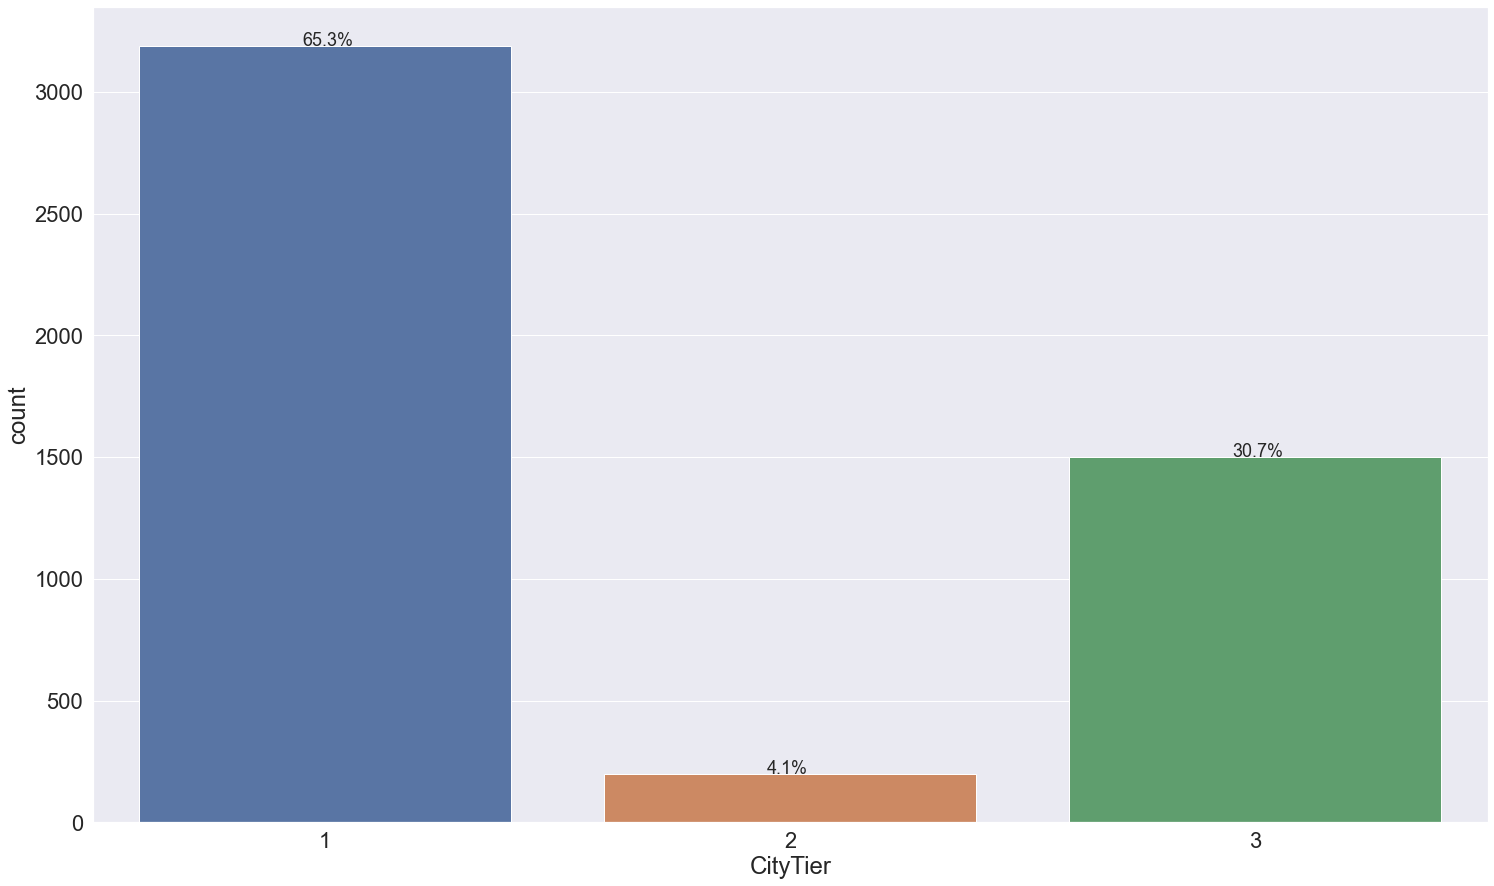

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["CityTier"])
perc_on_bar(ax, travel["CityTier"])

### 3.2.13 - Occupation

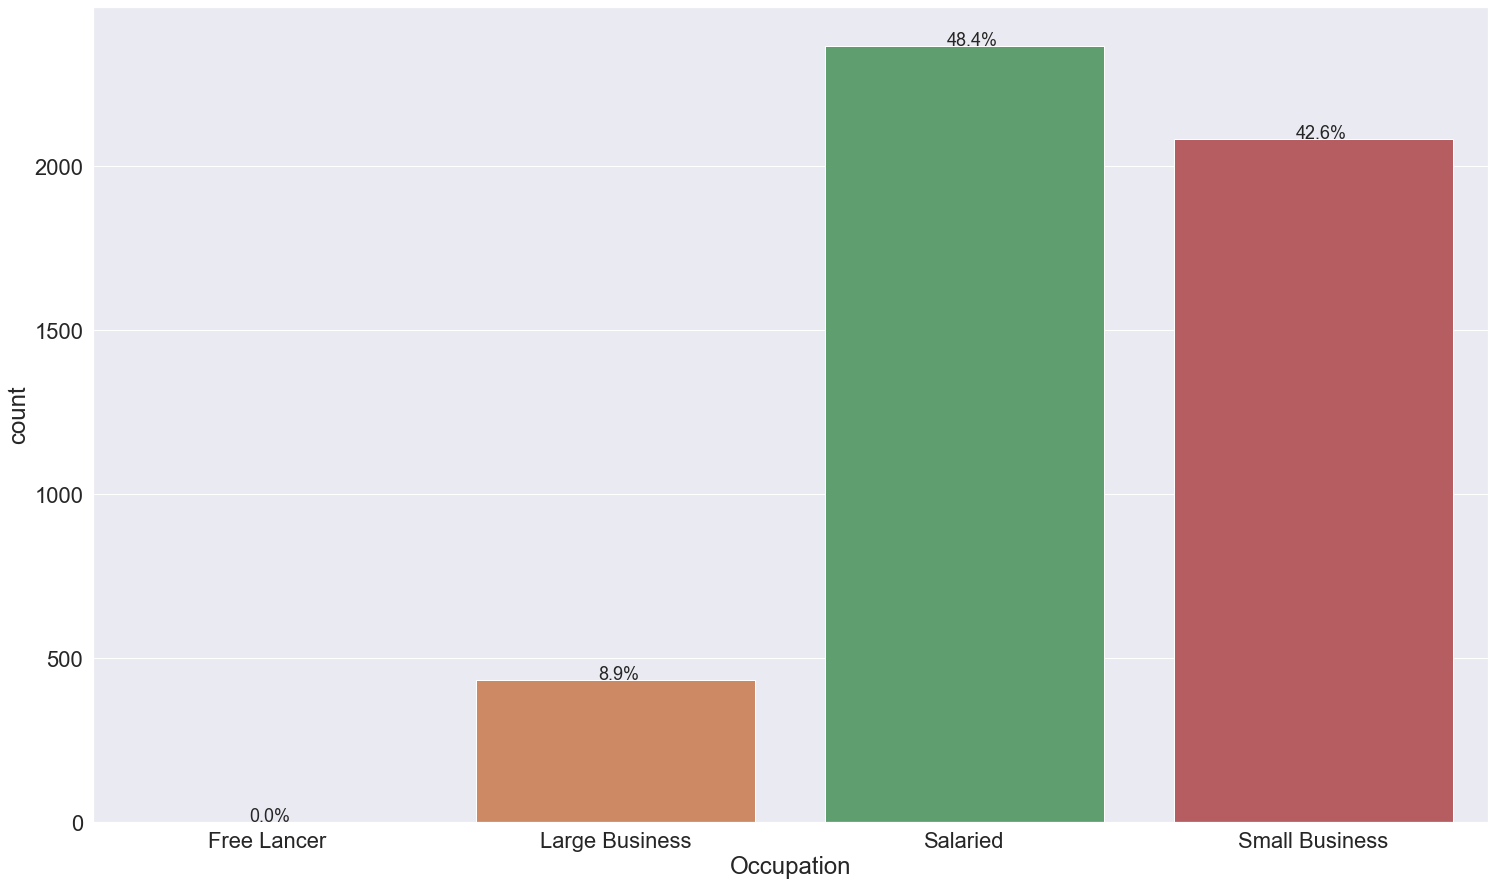

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["Occupation"])
perc_on_bar(ax, travel["Occupation"])

### 3.2.14 - Gender

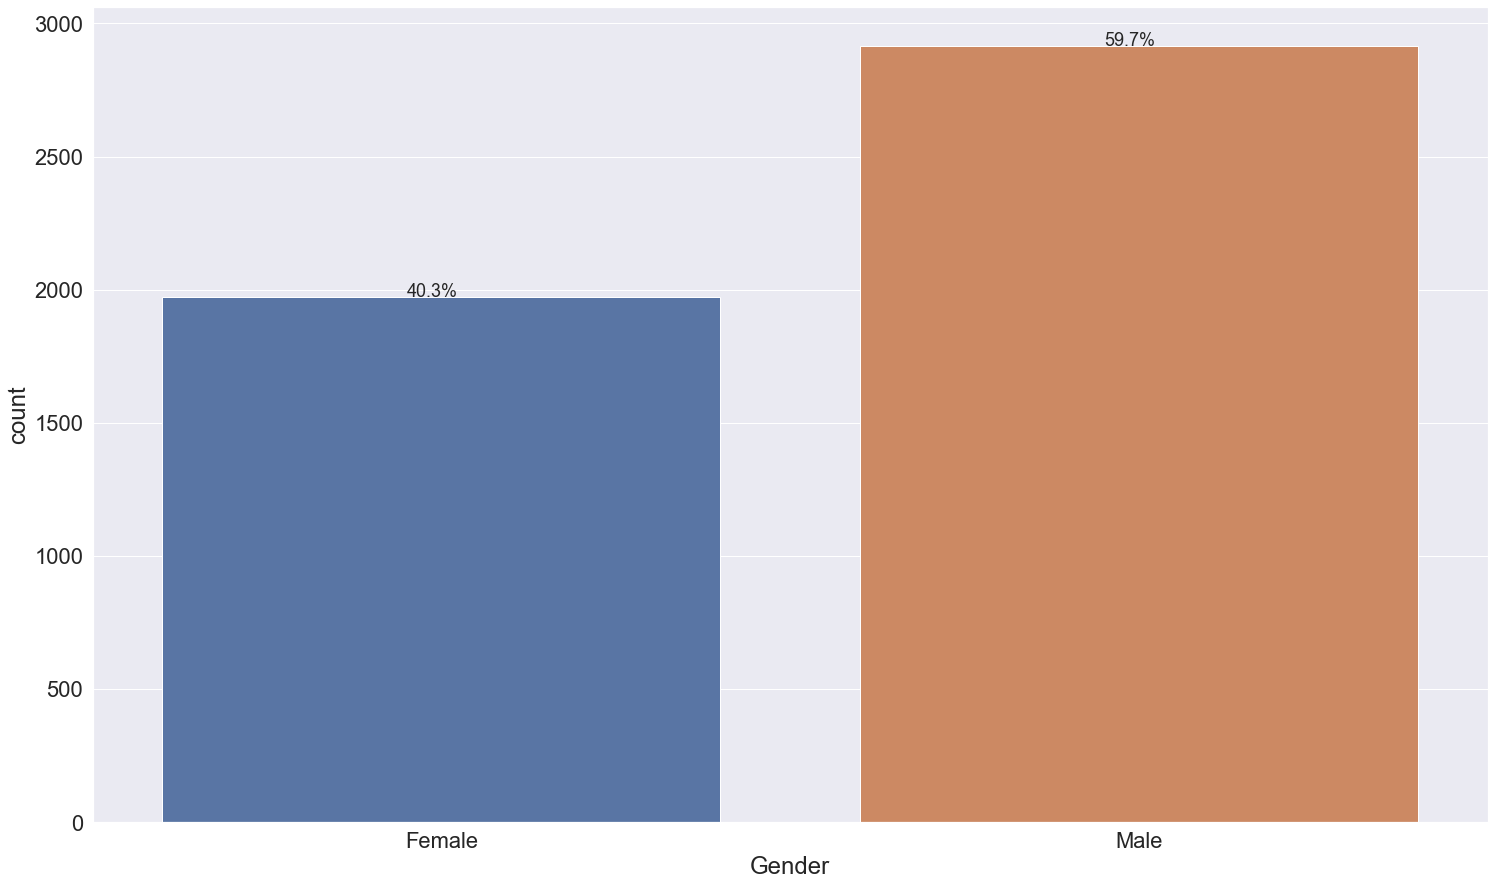

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["Gender"])
perc_on_bar(ax, travel["Gender"])

### 3.2.15 - Product Pitched

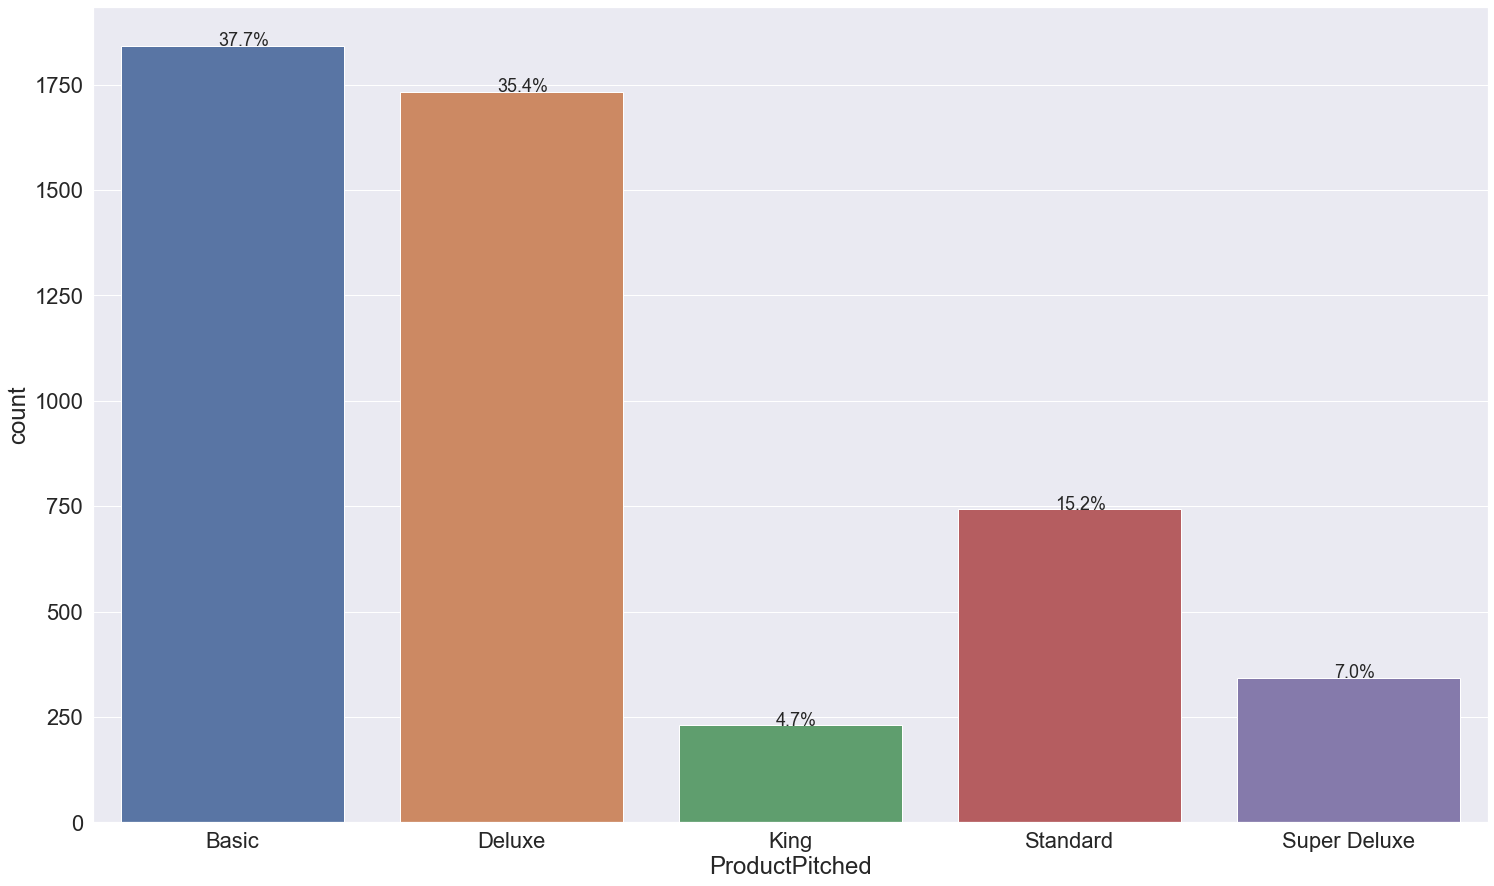

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["ProductPitched"])
perc_on_bar(ax, travel["ProductPitched"])

### 3.2.16 - Marital Status

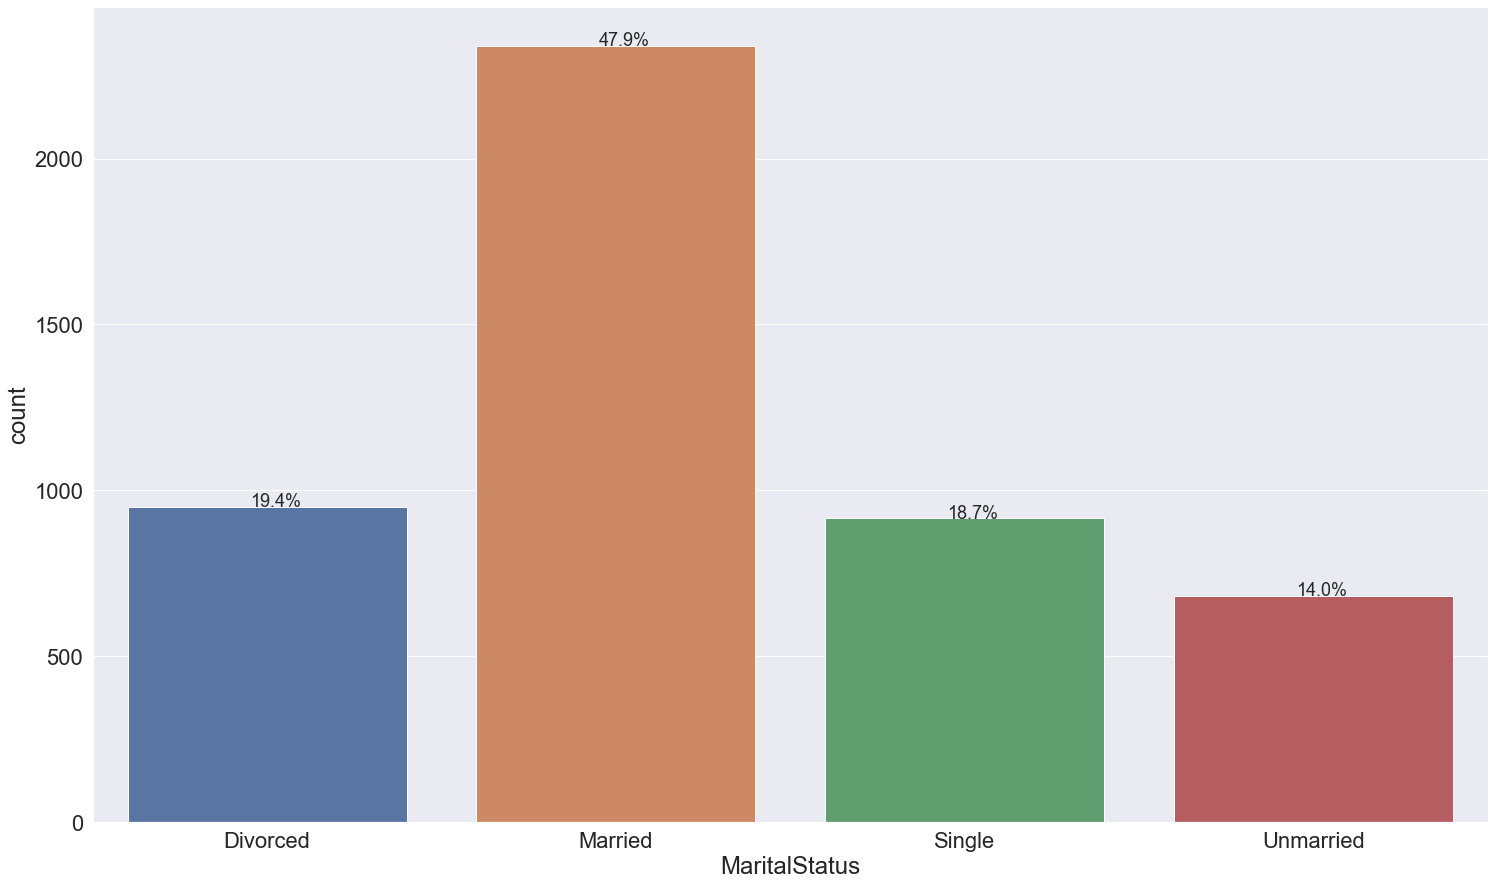

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["MaritalStatus"])
perc_on_bar(ax, travel["MaritalStatus"])

### 3.2.17 - Passport

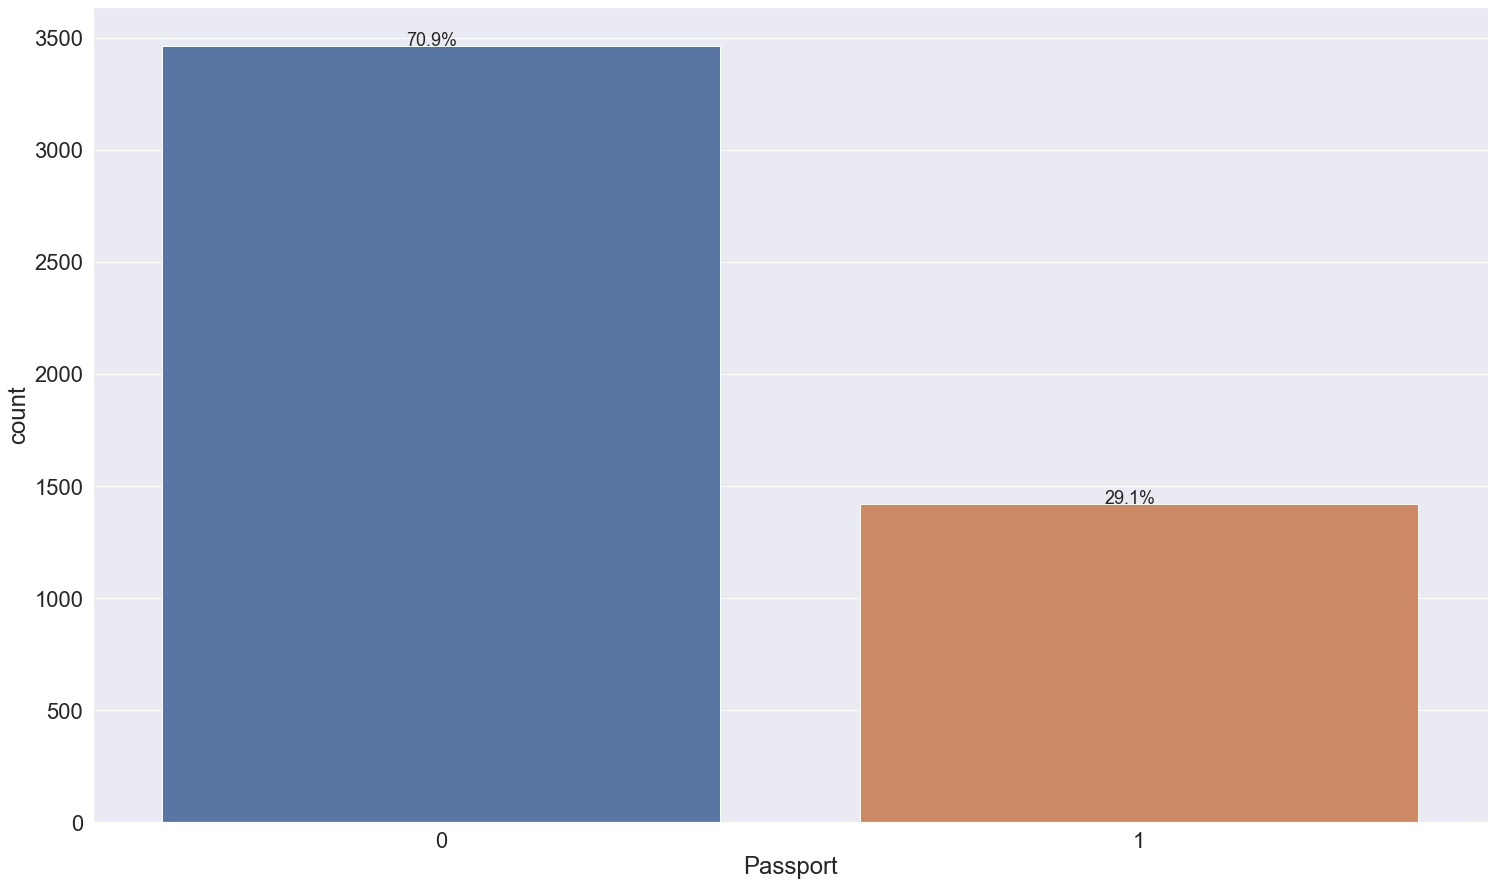

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["Passport"])
perc_on_bar(ax, travel["Passport"])

### 3.2.18 - Own Car

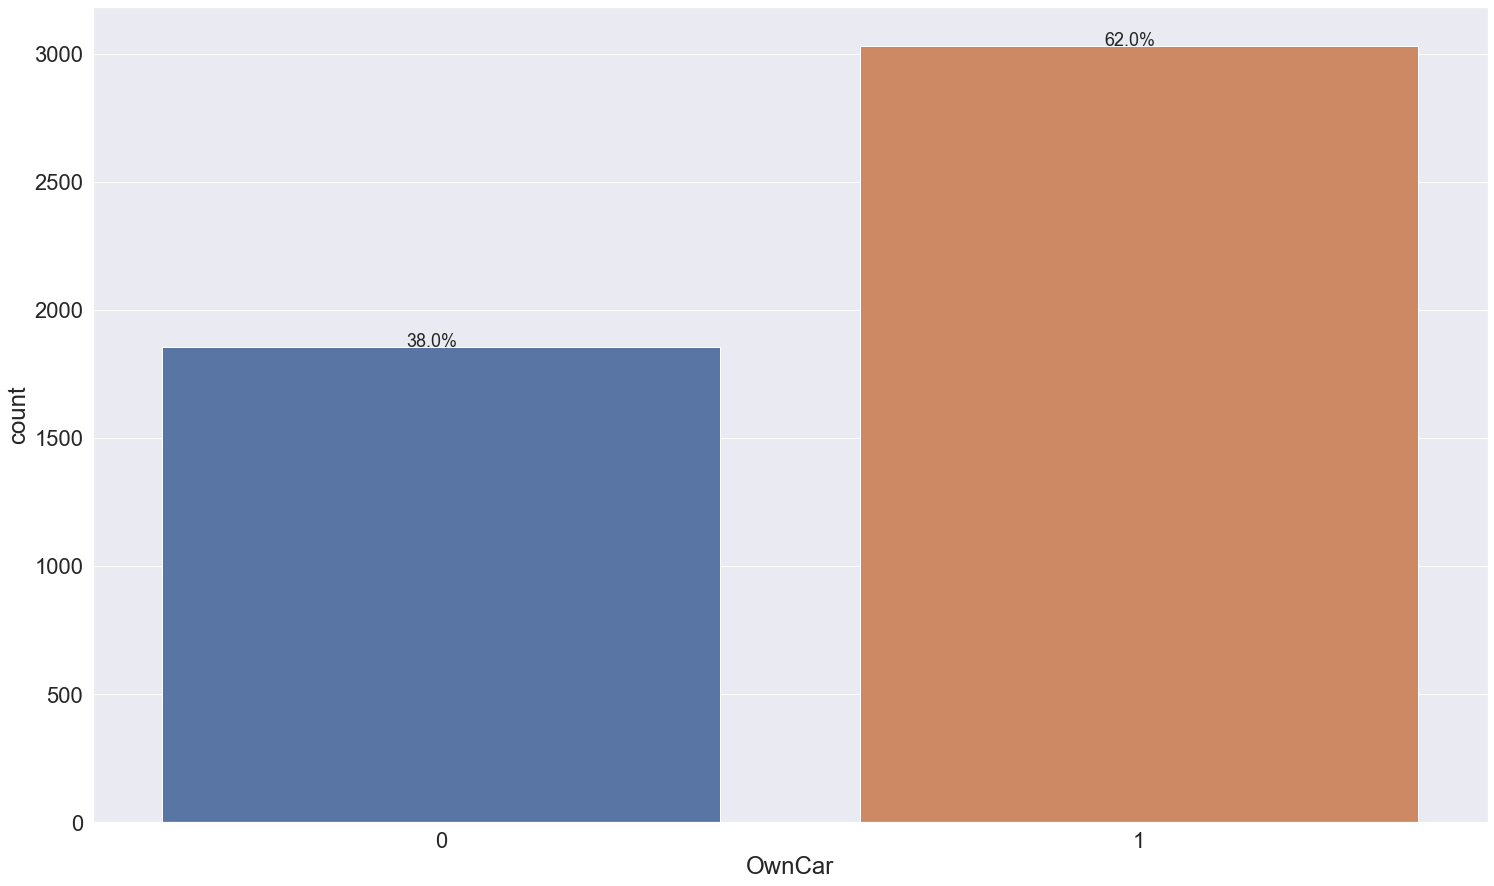

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["OwnCar"])
perc_on_bar(ax, travel["OwnCar"])

### 3.2.19 - Designation

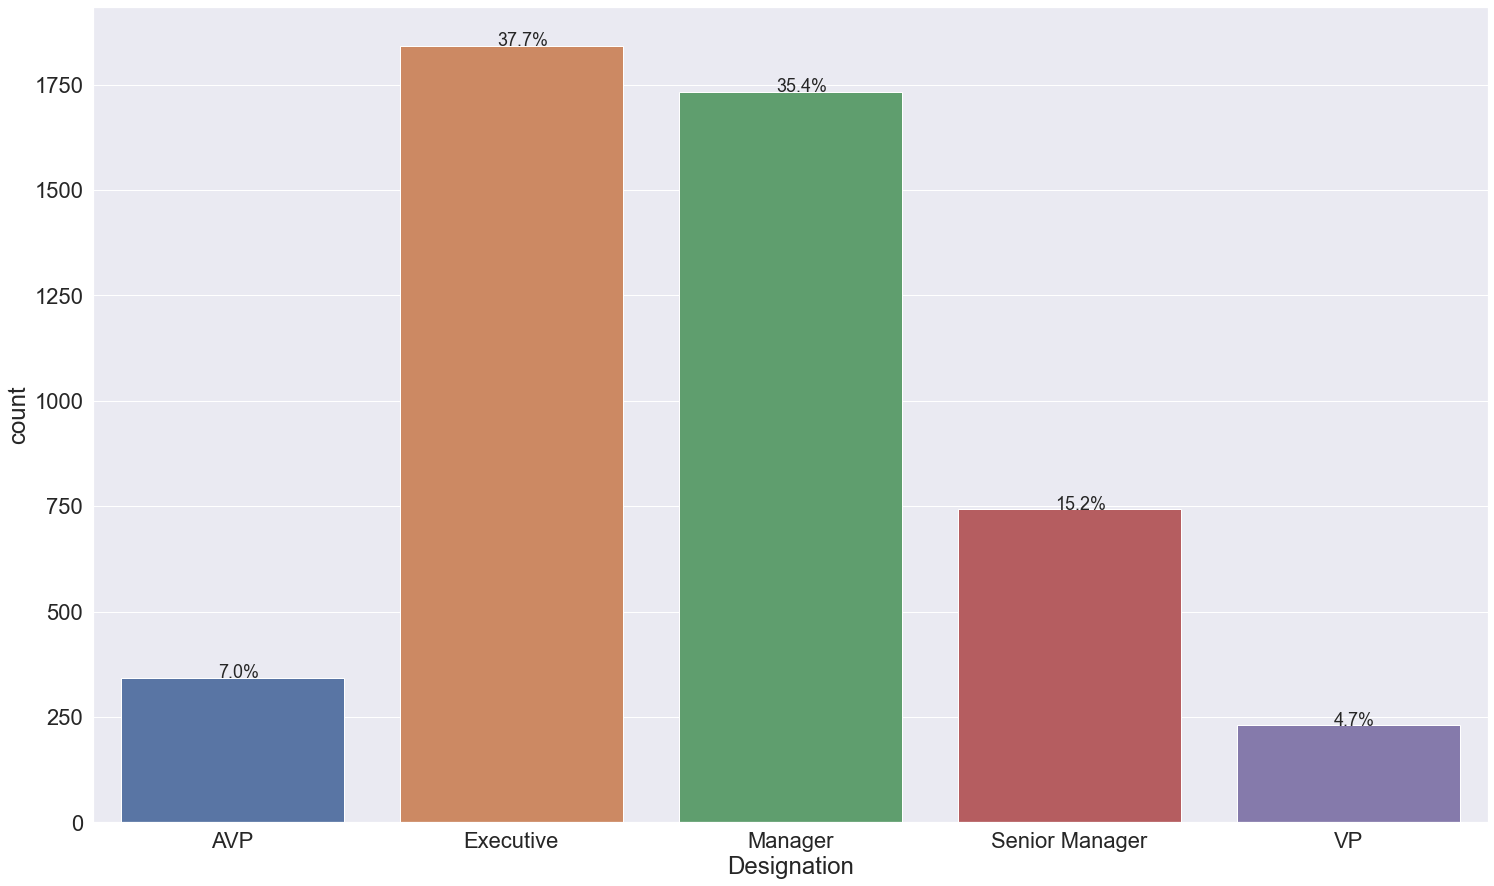

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(25, 15))
ax = sns.countplot(travel["Designation"])
perc_on_bar(ax, travel["Designation"])

# 4 - Data Preprocessing (Part 2 of 2)